<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on Practice Lab: Data Wrangling**

Estimated time needed: **30** minutes

In this lab, you will use the skills acquired in the module and address the issues of handling missing data, correct the data type of the dataframe attribute and execute the processes of data standardization and data normalization on specific attributes of the dataset.


# Objectives

After completing this lab you will be able to:

 - Handle missing data in different ways
 - Correct the data type of different data values as per requirement
 - Standardize and normalize the appropriate data attributes
 - Visualize the data as grouped bar graph using Binning
 - Cnverting a categorical data into numerical indicator variables


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` to download the dataset
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Download the updated dataset by running the cell below.

The functions below will download the dataset into your browser:


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

To obtain the dataset, utilize the download() function as defined above:


In [ ]:
await download(file_path, "laptops.csv")
file_name="laptops.csv"

First we load data into a `pandas.DataFrame`:


In [ ]:
df = pd.read_csv(file_name, header=0)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [2]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath, header=None)

Verify loading by displaying the dataframe summary using `dataframe.info()`


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       238 non-null    float64
 1   1       239 non-null    object 
 2   2       239 non-null    object 
 3   3       239 non-null    object 
 4   4       239 non-null    object 
 5   5       239 non-null    object 
 6   6       239 non-null    object 
 7   7       235 non-null    object 
 8   8       239 non-null    object 
 9   9       239 non-null    object 
 10  10      239 non-null    object 
 11  11      234 non-null    object 
 12  12      239 non-null    object 
dtypes: float64(1), object(12)
memory usage: 24.4+ KB
None


View the first 5 values of the updated dataframe using `dataframe.head()`


In [15]:
column_names = ['Naan', 'Manufacturer', 'Category', 'Screen', 'GPU','OS', 'CPU_core', 'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_kg', 'Price']
df.columns = column_names
df.drop(0)
print(df.columns)

Index(['Naan', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')


In [17]:
df = df.drop(0)
df.head()

,Naan,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
1,0.0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
2,1.0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
3,2.0,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
4,3.0,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
5,4.0,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


Note that we can update the `Screen_Size_cm` column such that all values are rounded to nearest 2 decimal places by using `numpy.round()`


In [18]:
df['Screen_Size_cm'] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Naan,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
1,0.0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
2,1.0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
3,2.0,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
4,3.0,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
5,4.0,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


# Task - 1

### Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data. 


In [21]:
# Write your code below and press Shift+Enter to execute 
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.tolist():
    print(column)
    print(missing_data[column.value_counts()])


    Naan  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
1  False         False     False   False  False  False     False   
2  False         False     False   False  False  False     False   
3  False         False     False   False  False  False     False   
4  False         False     False   False  False  False     False   
5  False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
5           False          False   False           False      False  False  
Naan


AttributeError: 'str' object has no attribute 'value_counts'

<details><summary>Click here for the solution</summary>

```python
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  
```

</details>


# Task - 2

### Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.


In [23]:
# Write your code below and press Shift+Enter to execute
avg_weight =df['Weight_kg'].astype('float').mean(axis=0)
df['Weight_kg'].replace(np.nan, avg_weight, inplace=True)
print(df['Weight_kg'])

1       1.6
2       2.2
3       2.2
4      1.22
5      1.91
       ... 
234     1.7
235     1.2
236    1.36
237     2.4
238    1.95
Name: Weight_kg, Length: 238, dtype: object


<details>
    <summary>Click here for the solution</summary>
    
```python
# replacing missing data with mean
avg_weight=df['Weight_kg'].astype('float').mean(axis=0)
df["Weight_kg"].replace(np.nan, avg_weight, inplace=True)

# astype() function converts the values to the desired data type
# axis=0 indicates that the mean value is to calculated across all column elements in a row.
```

</details>


### Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. We note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.


In [24]:
# Write your code below and press Shift+Enter to execute
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

C:\Users\ebana\AppData\Local\Temp\ipykernel_8144\1726139442.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)


<details>
    <summary>Click here for the solution</summary>
    
```python
# replacing missing data with mode
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)
```
</details>


# Task - 3

### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.


In [25]:
# Write your code below and press Shift+Enter to execute
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")


<details>
    <summary>Click here for Solution</summary>

```python
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")
```

</details>


# Task - 4

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [27]:
# Write your code below and press Shift+Enter to execute
df['Weight_kg'] = df['Weight_kg']*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

df['Screen_Size_cm'] = df['Screen_Size_cm']/2.54
df.rename(columns={'Screen_Size_cm': 'Screen_Size_inch'}, inplace=True)

<details>
    <summary>Click here for Solution</summary>

```python
# Data standardization: convert weight from kg to pounds
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

# Data standardization: convert screen size from cm to inch
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)
```
</details>


### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.


In [29]:
# Write your code below and press Shift+Enter to execute
df['CPU_frequency'] = pd.to_numeric(df['CPU_frequency'], errors='coerce')

# Perform the division operation
df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()

print(df)

      Naan Manufacturer Category     Screen GPU OS CPU_core  Screen_Size_inch  \
1      0.0         Acer        4  IPS Panel   2  1        5              14.0   
2      1.0         Dell        3    Full HD   1  1        3              15.6   
3      2.0         Dell        3    Full HD   1  1        7              15.6   
4      3.0         Dell        4  IPS Panel   2  1        5              13.3   
5      4.0           HP        4    Full HD   2  1        7              15.6   
..     ...          ...      ...        ...  .. ..      ...               ...   
234  233.0       Lenovo        4  IPS Panel   2  1        7              14.0   
235  234.0      Toshiba        3    Full HD   2  1        5              13.3   
236  235.0       Lenovo        4  IPS Panel   2  1        5              12.0   
237  236.0       Lenovo        3    Full HD   3  1        5              15.6   
238  237.0      Toshiba        3    Full HD   2  1        5              14.0   

     CPU_frequency RAM_GB S

<details>
    <summary>Click here for Solution</summary>

```python
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()
```
</details>


# Task - 5

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".


In [32]:
# Write your code below and press Shift+Enter to execute
df['Price'] = pd.to_numeric(df['Price'])
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )
print(df)

      Naan Manufacturer Category     Screen GPU OS CPU_core  Screen_Size_inch  \
1      0.0         Acer        4  IPS Panel   2  1        5              14.0   
2      1.0         Dell        3    Full HD   1  1        3              15.6   
3      2.0         Dell        3    Full HD   1  1        7              15.6   
4      3.0         Dell        4  IPS Panel   2  1        5              13.3   
5      4.0           HP        4    Full HD   2  1        7              15.6   
..     ...          ...      ...        ...  .. ..      ...               ...   
234  233.0       Lenovo        4  IPS Panel   2  1        7              14.0   
235  234.0      Toshiba        3    Full HD   2  1        5              13.3   
236  235.0       Lenovo        4  IPS Panel   2  1        5              12.0   
237  236.0       Lenovo        3    Full HD   3  1        5              15.6   
238  237.0      Toshiba        3    Full HD   2  1        5              14.0   

     CPU_frequency RAM_GB S

<details>
    <summary>Click here for Solution</summary>

```python
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )
```
</details>


Also, plot the bar graph of these bins.


Text(0.5, 1.0, 'price bins')

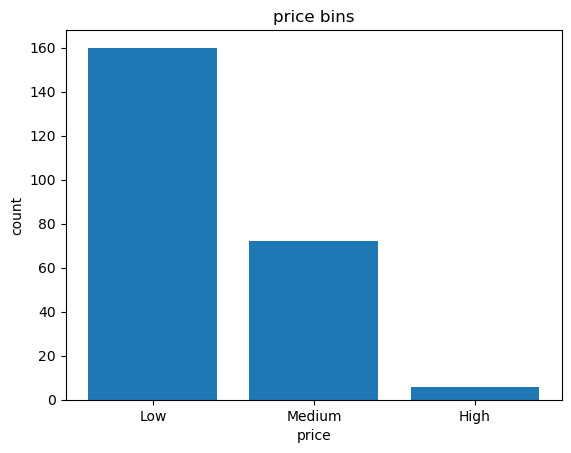

In [35]:
# Write your code below and press Shift+Enter to execute
plt.bar(group_names, df['Price-binned'].value_counts())
plt.xlabel('price')
plt.ylabel('count')
plt.title('price bins')

<details>
    <summary>Click here for Solution</summary>

```python
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")
```
</details>


# Task - 6

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [36]:
# Write your code below and press Shift+Enter to execute
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

<details>
    <summary>Click here for Solution</summary>

```python
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)
```

</details>


This version of the dataset, now finalized, is the one you'll be using in all subsequent modules. 


Print the content of dataframe.head() to verify the changes that were made to the dataset.


In [37]:
print(df.head())

   Naan Manufacturer Category GPU OS CPU_core  Screen_Size_inch  \
1   0.0         Acer        4   2  1        5              14.0   
2   1.0         Dell        3   1  1        3              15.6   
3   2.0         Dell        3   1  1        7              15.6   
4   3.0         Dell        4   2  1        5              13.3   
5   4.0           HP        4   2  1        7              15.6   

   CPU_frequency RAM_GB Storage_GB_SSD  Weight_pounds  Price Price-binned  \
1       0.551724      8            256        3.52800    978          Low   
2       0.689655      4            256        4.85100    634          Low   
3       0.931034      8            256        4.85100    946          Low   
4       0.551724      8            128        2.69010   1244          Low   
5       0.620690      8            256        4.21155    837          Low   

   Screen-Full_HD  Screen-IPS_panel  
1           False              True  
2            True             False  
3            True   

# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


Copyright © 2023 IBM Corporation. All rights reserved.


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised| --!>
